# Problem Set - Gaussian Processes 

In [352]:
# The modules we will be using in this problem set
import util, test # These are local modules please feel free to read through them
from importlib import reload
reload(util)
reload(test)
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Gaussian Processes##

In this problem set, you will gain a deeper understanding of how gaussian processes work by working on building a small library for guassian regression and classification. If you are having serious problems with this Pset please feel free to ask on Piazza or refer to [Gaussian Proccess: A Quick Introduction](A Quick Intro To Gaussian Proccesses.pdf).

### Problems
1. [Part 1 - Overveiw](#Part-1---Overveiw)
  1. [Problem 1 (10 pts)](#Problem-1---Making-a-Simple-Kernal-%2810-pts%29)
  2. [Problem 2 (5 pts)](#Problem-2---Making-a-Periodic-Kernal-%285-pts%29)
2. [Part 2 - Regression](#Part-2---Regression)
  1. [Problem 3 (5 pts)](#Problem-3---Getting-K-Matrix-%285-pts%29)
  2. [Problem 4 (20 pts)](#Problem-4---Regression-GP-%2820-pts%29)
  3. [Problem 5 (5 pts)](#Problem-5---Manual-Parameter-Tuning-%285-pts%29) 
  4. [Problem 6 (10 pts)](#Problem-6---Optimal-Parameters-%2810-pts%29)
3. [Part 3 - Classification](#Part-3---Classification)

# Part 1 - Overveiw

Say something Here

## Problem 1 - Making a Simple Kernel (10 pts)

In [286]:
def kernel(x0, x1, params, sigma_n):
    diff = np.subtract.outer(x0, x1)
    value = params[0]**2 * np.exp( -0.5 * (1.0/params[1]**2) * diff**2)
    value[np.where(diff == 0.0)] += sigma_n**2
    return value

In [287]:
reload(test)
test.test_simple_kernel(kernel)

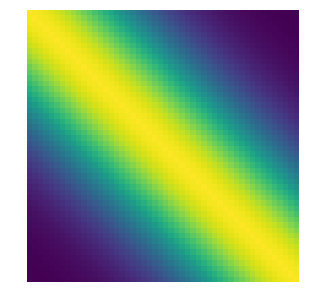

In [288]:
x = np.linspace(-5, 5, 50)
sigma_n = 0.1
params = [1, 3]
K = kernel(x, x, params, sigma_n)
util.visiualize_kernel(K)

## Problem 2 - Making a Periodic Kernel (5 pts)

In [289]:
def periodic_kernel(x0, x1, params, sigma_n):
    diff = np.subtract.outer(x0, x1)
    value = params[0]**2 * np.exp( -0.5 * (1.0/params[1]**2) * diff**2)
    value += params[2]**2 * np.exp(-2 * np.sin(params[3]*diff)**2)
    value[np.where(diff == 0.0)] += sigma_n**2
    return value

In [290]:
test.test_periodic_kernel(periodic_kernel)

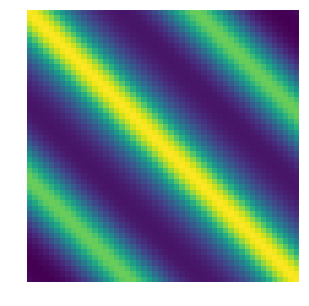

In [291]:
x = np.linspace(-5, 5, 50)
sigma_n = 0.1
params = [1, 2, 2, 0.5]
K = periodic_kernel(x, x, params, sigma_n)
util.visiualize_kernel(K)

# Part 2 - Regression

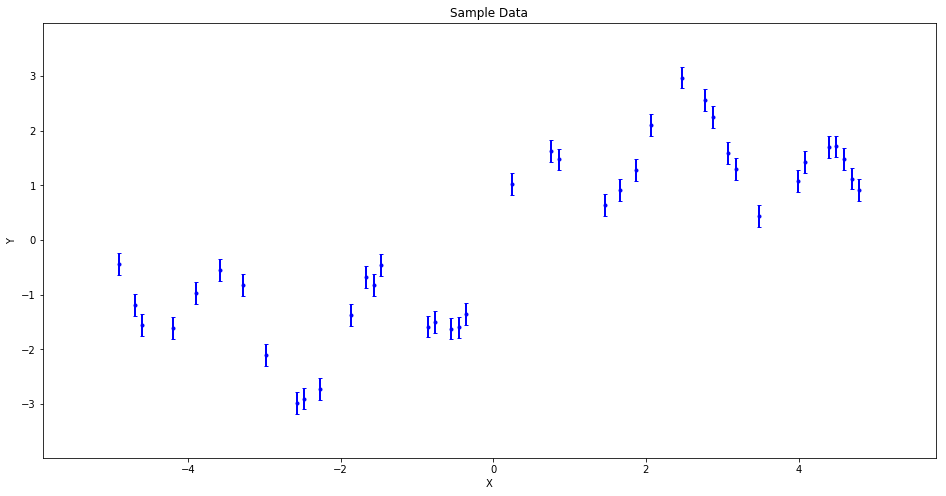

In [292]:
reload(util)
x, y = util.get_sample_data_1()
sigma_n = 0.1
util.scatter_raw_data(x, y, sigma_n)

## Problem 3 - Getting K Matrix (5 pts)

In [293]:
def get_Ks(x_new, x, kernel, theta):
    K = kernel(x, x, theta[:-1], theta[-1]) # K
    KS = kernel(x_new, x, theta[:-1], theta[-1]) # K*
    KSS = kernel(x_new, x_new, theta[:-1], theta[-1]) # K**
    return K, KS, KSS

In [294]:
reload(test)
test.test_get_Ks(get_Ks, kernel)

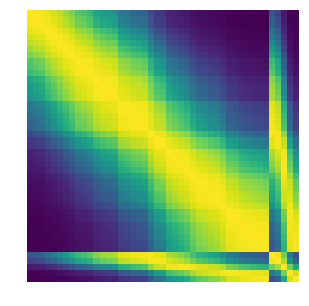

In [295]:
theta = [1, 3, sigma_n]
x_new = np.array([0, 0.5, 2, 4, 5])
K, KS, KSS = get_Ks(x_new, x, kernel, theta)
util.visiualize_Ks(K, KS, KSS)

## Problem 4 - Regression GP (20 pts)

In [296]:
def regression_GP(x_new, x, y, kernel, theta):
    K, KS, KSS = get_Ks(x_new, x, kernel, theta)

    y = np.matmul(np.matmul(KS, np.linalg.inv(K)),y)
    var = KSS - KS.dot(np.linalg.inv(K).dot(KS.T))
    var = np.diagonal(var)
    return(y.squeeze(), var.squeeze())

In [297]:
reload(test)
test.test_regression(regression_GP, kernel)

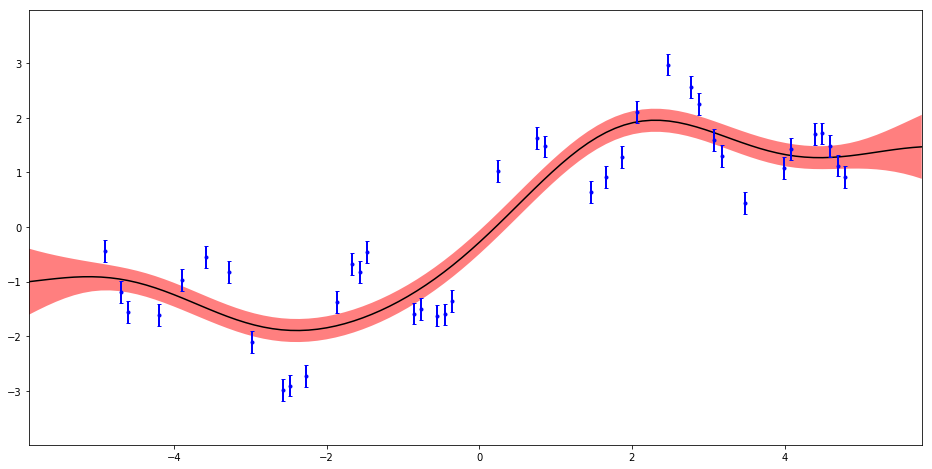

In [298]:
reload(util)
reload(test)
sigma_n = 0.1
theta = [1, 2, sigma_n]
util.solve_and_visualize(regression_GP, kernel, x, y, theta)

## Problem 5 - Manual Parameter Tuning (5 pts)

writing here 

Ask them what the happens as they change the values of theta above


What happens when you cange theta[0] (sigma_f)? 
What happens when you cange theta[1] (l)?
What happens when you cange sigma_n?

## Problem 6 - Optimal Parameters (10 pts)

In [299]:
def regression_optimize_theta(x, y, sigma_n, kernel, params_0=[0.1, 0.1]):
    def log_pY(theta):
        K = kernel(x, x, theta, sigma_n)
        log_k = np.linalg.slogdet(K)[1]
        output = 0.5 * np.matmul(np.matmul(y.T, np.linalg.inv(K)),y)
        output += 0.5 * log_k
        return output

    res = minimize(log_pY, params_0, method='nelder-mead', options={'xtol': 1e-8, 'disp': False})
    return list(res.x) + [sigma_n]

In [300]:
reload(test)
test.test_regression_ouptimize_theta(regression_optimize_theta, kernel)

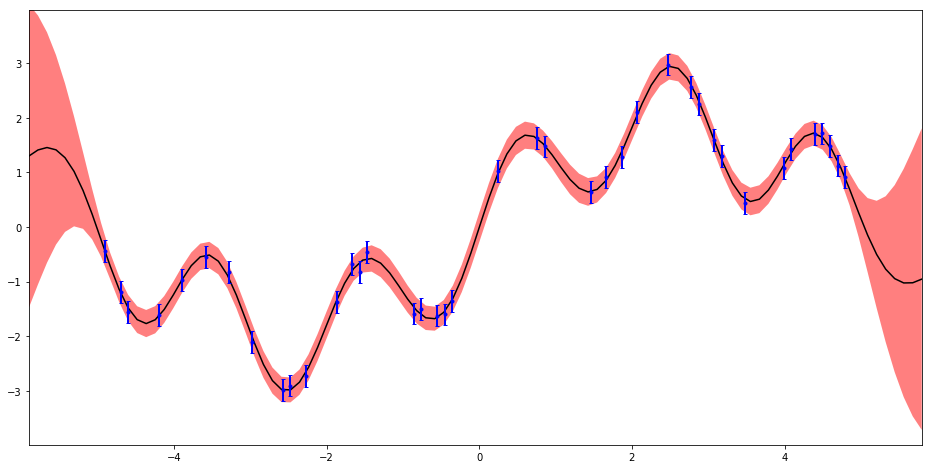

In [301]:
theta = regression_optimize_theta(x, y, sigma_n, kernel, [1, 0.1])
util.solve_and_visualize(regression_GP, kernel, x, y, theta)

# Part 3 - Classification

## Problem 6

Description of a sigmoid function
<center>$S(x)$ = $\dfrac{1}{1+e^{-x}}$</center>
In this PSet use $S(x)$ as the sigmoid functiod in the implementation of the following problems

Implement $S(x)$.

In [303]:
def sigmoid(x):
    return 1./(1+np.exp(-x))

In [304]:
test.test_sigmoid(sigmoid)

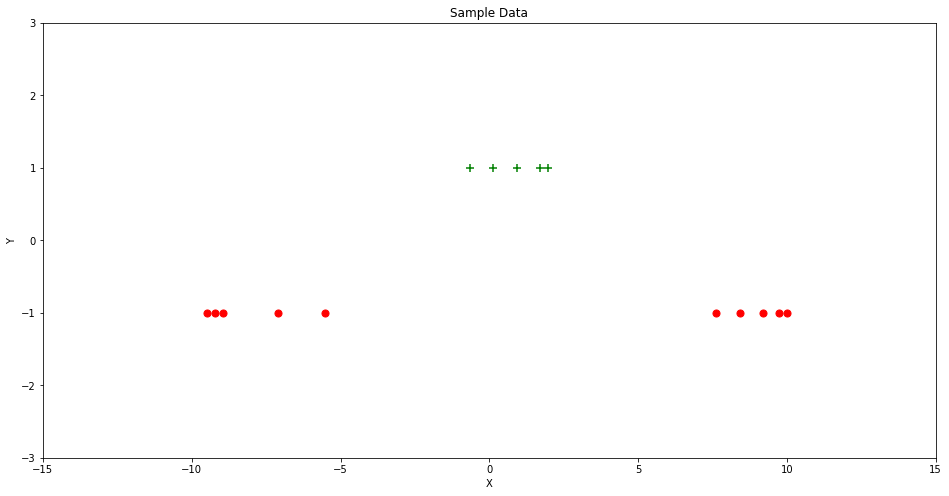

In [305]:
x, y = util.get_sample_classification_data()
util.scatter_raw_data_classification(x, y)

Solve for the covariance matrices K, K$*$, and K$**$ using the function you implemented above. Assume $\theta$ = [0.4, 5, 0]

In [306]:
theta = [.4, 5, 0]
K, KS, KSS = get_Ks(x, x, kernel, theta)

In [307]:
test.test_get_Ks(get_Ks, kernel)

Find f

In [319]:
def find_f(K, y):
    n = len(y) 
    f = np.zeros(n)  
    y_giv_f = np.zeros(n)
    grad = np.zeros(n)
    
    for i in range(0, 100):
        for j in range(n):
            y_giv_f[j] = sigmoid(f[j]*y[j])
            grad[j] = (1-y_giv_f[j])*y[j]
        f = np.array(np.matmul(K, grad)).flatten()
    for j in range(n):
        y_giv_f[j] = sigmoid(f[j]*y[j])
    return f, y_giv_f

In [320]:
test.test_find_f(find_f, get_Ks, kernel)

(array([-0.21328784, -0.2432166 , -0.22162858, -0.0952301 , -0.22880608,
         0.1138604 ,  0.07799312,  0.10705633,  0.10285364,  0.06440997,
        -0.21687374, -0.18320825, -0.25459694, -0.22592811, -0.19545694]),
 array([0.55312073, 0.56050618, 0.55518146, 0.52378955, 0.55695327,
        0.52843439, 0.5194884 , 0.52673855, 0.52569077, 0.51609693,
        0.55400692, 0.54567438, 0.56330764, 0.55624299, 0.54870926]))

Write a function that solves for W given f and y

In [321]:
def calc_W(f, y):
    n = len(y)
    W = np.zeros(n)
    for j in range(n):
        sigmoid_v = sigmoid(f[j]*y[j])
        W[j] = y[j]**2 * (1-sigmoid_v)*sigmoid_v
    return W

In [322]:
test.test_calc_W(calc_W, find_f, get_Ks, kernel)

array([0.24717819, 0.246339  , 0.24695501, 0.24943406, 0.24675633,
       0.24919149, 0.2496202 , 0.24928505, 0.24933998, 0.24974089,
       0.24708325, 0.24791385, 0.24599214, 0.24683673, 0.24762741])

Write a function that solves for $K'$

In [326]:
def calculate_KP(K, W):
    return K + (1.0/W)

In [327]:
test.test_calc_KP(calculate_KP, calc_W, find_f, get_Ks, kernel)

array([[4.19920802, 4.18677176, 4.16371002, 4.18150705, 4.20456848,
        4.05261461, 4.09009696, 4.03448455, 4.10167374, 4.08633255,
        4.06919959, 4.06482582, 4.0297888 , 4.07131903, 4.05071183],
       [4.19722594, 4.18875384, 4.17070176, 4.18479231, 4.19644143,
        4.06463598, 4.10534816, 4.04419421, 4.1167868 , 4.10146407,
        4.06988392, 4.06573411, 4.03257313, 4.07182836, 4.05225371],
       [4.18870958, 4.18524713, 4.17420846, 4.18303168, 4.18108334,
        4.08296397, 4.12532803, 4.05984553, 4.13529564, 4.12168358,
        4.07137583, 4.06767101, 4.03793698, 4.0729634 , 4.05539816],
       [4.19570132, 4.18853238, 4.17222638, 4.18501376, 4.19303396,
        4.06899534, 4.11044016, 4.04782416, 4.12165361, 4.10657052,
        4.07018506, 4.06612913, 4.03371989, 4.07205512, 4.05290849],
       [4.19376268, 4.17518144, 4.14527798, 4.1680339 , 4.21001382,
        4.03643156, 4.06624308, 4.02214522, 4.07653729, 4.06310608,
        4.06856643, 4.06396579, 4.02685502, 

Now we have all the necessary components. 

In [336]:
def GPC(x_new, x, y, kernel, theta):
    K = kernel(x, x, theta[:-1], theta[-1]) # K
    KS = kernel(x_new, x, theta[:-1], theta[-1]) # K*
    KSS = kernel(x_new, x_new, theta[:-1], theta[-1]) # K**
    
    f, y_giv_f = find_f(K, y)
    W = calc_W(f, y)
    
    KP = calculate_KP(K, W)

    f_bar = np.matmul(np.matmul(KS, np.linalg.inv(K)), f)    
    var = KSS - KS.dot(np.linalg.inv(KP).dot(KS.T))
    var = np.diagonal(var)
    return(f_bar.squeeze(), var.squeeze())


In [337]:
test.test_GPC(GPC, calculate_KP, calc_W, find_f, get_Ks, kernel)

(array([-0.12358141, -0.14374241, -0.16453429, -0.18526667, -0.20513215,
        -0.22320641, -0.23850061, -0.25003298, -0.25689161, -0.25822027,
        -0.25345174, -0.24217683, -0.22437528, -0.20032036, -0.17063489,
        -0.13634422, -0.09874625, -0.05931997, -0.0199786 ,  0.01773004,
         0.05167678,  0.08052257,  0.10262436,  0.11686701,  0.12255157,
         0.11943238,  0.10774679,  0.08808948,  0.06137639,  0.0290859 ,
        -0.00716741, -0.04561413, -0.0845241 , -0.12202557, -0.15666363,
        -0.18698549, -0.21194676, -0.23089067, -0.24347147, -0.24969576,
        -0.24981604, -0.24443344, -0.23429114, -0.22029877, -0.20339304,
        -0.18454416, -0.16465653, -0.14454104, -0.12489541, -0.10624699]),
 array([0.04560726, 0.04638068, 0.04697337, 0.04739024, 0.04767226,
        0.04785617, 0.04798349, 0.04806686, 0.0481184 , 0.04812877,
        0.04809796, 0.04804026, 0.04795314, 0.04784278, 0.04775372,
        0.04762002, 0.04753321, 0.04742531, 0.04741078, 0.047401

We provided you with $\theta$, now write a function that optimizes $\theta$ for you. Ouput of function is a list.

In [353]:
def optimize_theta(x, y, kernel, params_0=[0.1, 0.1], sigma_n=0.1):
    def log_pY(theta):
        K = np.matrix(kernel(x, x, theta, sigma_n))
        f, y_giv_f = find_f(K, y)
        W = calc_W(f, y)
        inv_k = np.linalg.inv(K)
        log_k = np.log(np.linalg.det(K) * np.linalg.det(inv_k+W))
        Y_giv_f = np.prod(y_giv_f)
        output = 0.5 * np.matmul(np.matmul(f.T, inv_k),f)
        output += 0.5 * log_k
        output -= np.log(Y_giv_f)
        return output

    res = minimize(log_pY, params_0, method='nelder-mead', options={'xtol': 1e-8, 'disp': False})
    return list(res.x) + [sigma_n]

In [354]:
test.test_optimize_theta(optimize_theta, kernel)

[1.8165855832464077, 0.3220360502776173, 0.1]

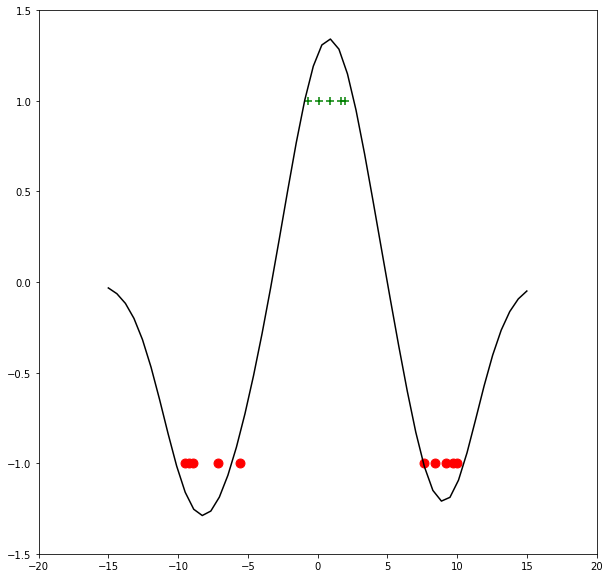

In [363]:
x_new = np.linspace(-15, 15, 50)
params_0 = [.4, 5]
sigma_n = 0.1
theta = optimize_theta(x, y, kernel, params_0=params_0, sigma_n=sigma_n)
y_bar, var = GPC(x_new, x, y, kernel, theta)

fig, axs = plt.subplots(1, 1)
for i in range(len(x)):
    if y[i] > 0:
        axs.scatter(x[i], y[i], 80, marker='+', color='g')
    else:
        axs.scatter(x[i], y[i], 80, marker='o', color='r')
axs.plot(x_new, y_bar,  color='k')
pretty_plot(fig, axs)